## Project Title

Stock Market EDA & Price Movement Prediction – June 2025 Dataset

## Problem Statement

Stock price fluctuations are influenced by various factors such as company performance, market sentiment, and sector trends. Understanding these patterns through Exploratory Data Analysis (EDA) and predicting whether a stock will close higher than its opening price can provide valuable insights for investors and analysts.

The goal of this project is to analyze the June 2025 stock market dataset, identify hidden patterns using EDA, engineer meaningful features, and build a predictive model to classify price direction (up/down) for individual stocks.

#### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Load uploaded dataset

In [2]:
file_path = "dataset/stock_market_june2025.csv"
df = pd.read_csv(file_path)

#### Display basic info

In [3]:
df.head()

,Date,Ticker,Open Price,Close Price,High Price,Low Price,Volume Traded,Market Cap,PE Ratio,Dividend Yield,EPS,52 Week High,52 Week Low,Sector
0,01-06-2025,SLH,34.92,34.53,35.22,34.38,2966611,5.738136e+10,29.63,2.85,1.17,39.39,28.44,Industrials
1,01-06-2025,WGB,206.50,208.45,210.51,205.12,1658738,5.274707e+10,13.03,2.73,16.00,227.38,136.79,Energy
2,01-06-2025,ZIN,125.10,124.03,127.40,121.77,10709898,5.596949e+10,29.19,2.64,4.25,138.35,100.69,Healthcare
3,01-06-2025,YPY,260.55,265.28,269.99,256.64,14012358,7.964089e+10,19.92,1.29,13.32,317.57,178.26,Industrials
4,01-06-2025,VKD,182.43,186.89,189.40,179.02,14758143,7.271437e+10,40.18,1.17,4.65,243.54,165.53,Technology


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1762 non-null   object 
 1   Ticker          1762 non-null   object 
 2   Open Price      1762 non-null   float64
 3   Close Price     1762 non-null   float64
 4   High Price      1762 non-null   float64
 5   Low Price       1762 non-null   float64
 6   Volume Traded   1762 non-null   int64  
 7   Market Cap      1762 non-null   float64
 8   PE Ratio        1762 non-null   float64
 9   Dividend Yield  1762 non-null   float64
 10  EPS             1762 non-null   float64
 11  52 Week High    1762 non-null   float64
 12  52 Week Low     1762 non-null   float64
 13  Sector          1762 non-null   object 
dtypes: float64(10), int64(1), object(3)
memory usage: 192.8+ KB


#### Insights

- **Dataset Overview**: Rows: 1762, Columns: 14
- **Key columns**: Date, Ticker, Open Price, Close Price, Volume Traded, Market Cap, Sector, etc.
- All columns are clean — no missing values

#### Convert 'Date' to datetime

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")

**Converted Date to proper datetime format**

#### Basic stats for numerical columns

In [7]:
desc = df.describe()
display(desc)

,Date,Open Price,Close Price,High Price,Low Price,Volume Traded,Market Cap,PE Ratio,Dividend Yield,EPS,52 Week High,52 Week Low
count,1762,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03,1.762000e+03,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000
mean,2025-06-11 03:56:11.169126144,157.500443,157.567054,160.423258,154.703956,8.075851e+06,6.520977e+10,23.143859,2.337327,7.663621,189.009381,125.964574
min,2025-06-01 00:00:00,15.020000,14.770000,15.120000,14.480000,5.007270e+05,1.290761e+09,8.020000,0.010000,0.470000,17.030000,10.010000
25%,2025-06-06 00:00:00,86.592500,87.055000,88.487500,85.380000,4.268123e+06,2.717406e+10,16.997500,1.450000,3.745000,104.687500,66.662500
50%,2025-06-11 00:00:00,155.675000,155.675000,158.820000,152.725000,7.911528e+06,5.135322e+10,22.620000,2.330000,6.790000,185.425000,123.040000
75%,2025-06-17 00:00:00,227.207500,227.902500,231.627500,223.102500,1.160026e+07,7.623076e+10,28.977500,3.127500,10.350000,271.920000,179.825000
max,2025-06-21 00:00:00,434.400000,447.430000,453.860000,431.500000,6.537774e+07,3.481112e+12,44.890000,5.000000,54.100000,571.570000,345.530000
std,NaN,82.043046,82.227448,83.626559,80.647073,5.104890e+06,1.467168e+11,7.498239,1.124037,5.202411,99.082291,67.767279


#### Sector-wise count of stocks

In [9]:
sector_counts = df['Sector'].value_counts()
display(sector_counts)

Sector
Materials                 170
Financials                168
Healthcare                167
Industrials               166
Utilities                 165
Energy                    162
Consumer Discretionary    159
Technology                155
Communication Services    154
Real Estate               151
Consumer Staples          145
Name: count, dtype: int64

#### Plot Sector distribution

C:\Users\asus\AppData\Local\Temp\ipykernel_7588\3210644667.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Sector', order=sector_counts.index, palette='viridis')


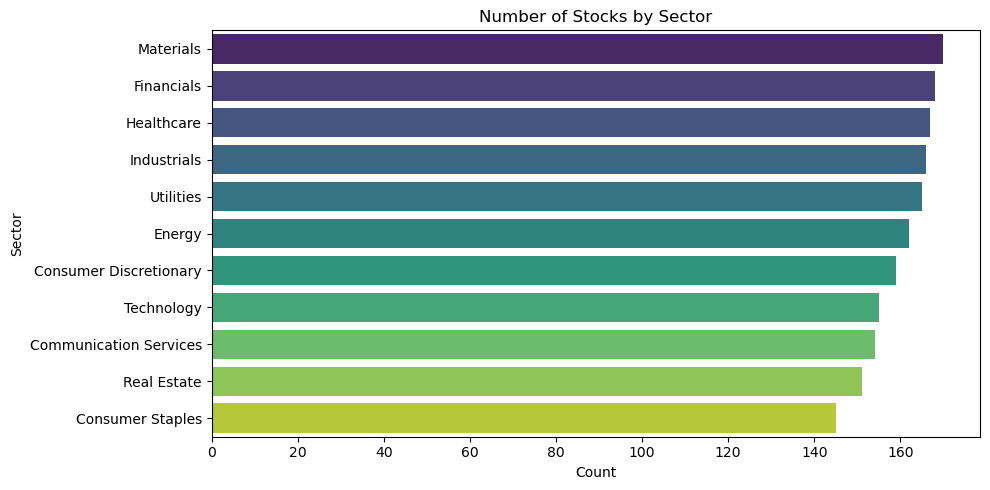

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='Sector', order=sector_counts.index, palette='viridis')
plt.title("Number of Stocks by Sector")
plt.xlabel("Count")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()

## GroupBy Analysis

#### GroupBy Sector: mean Close Price and Volume

In [12]:
grouped_sector = df.groupby('Sector')[['Close Price', 'Volume Traded']].mean().sort_values(by='Close Price', ascending=False)

#### Plot: Avg Close Price by Sector

C:\Users\asus\AppData\Local\Temp\ipykernel_7588\3935245242.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_sector.reset_index(), x='Close Price', y='Sector', palette='coolwarm')


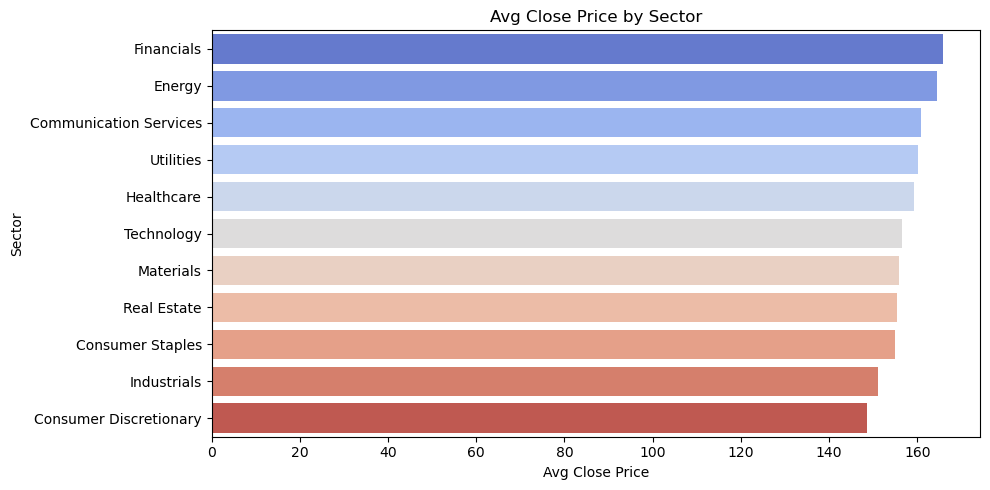

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(data=grouped_sector.reset_index(), x='Close Price', y='Sector', palette='coolwarm')
plt.title("Avg Close Price by Sector")
plt.xlabel("Avg Close Price")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()

#### Plot: Avg Volume by Sector

C:\Users\asus\AppData\Local\Temp\ipykernel_7588\2438490172.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_sector.reset_index(), x='Volume Traded', y='Sector', palette='magma')


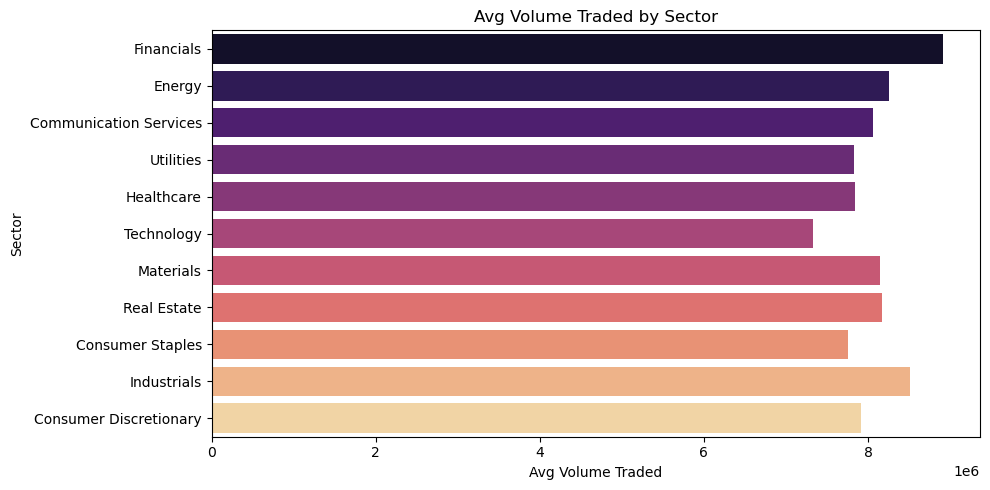

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(data=grouped_sector.reset_index(), x='Volume Traded', y='Sector', palette='magma')
plt.title("Avg Volume Traded by Sector")
plt.xlabel("Avg Volume Traded")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()

In [17]:
grouped_sector.round(2)

,Close Price,Volume Traded
Sector,,
Financials,165.88,8918761.39
Energy,164.53,8252284.31
Communication Services,160.78,8058344.05
Utilities,160.01,7830719.15
Healthcare,159.25,7843051.66
Technology,156.48,7334980.44
Materials,155.76,8141785.62
Real Estate,155.44,8171080.70
Consumer Staples,154.83,7760762.90


### Create New Features

#### Feature: Daily Price Range

In [19]:
df['Price Range'] = df['High Price'] - df['Low Price']

#### Feature: Volatility

In [20]:
df['Volatility'] = (df['High Price'] - df['Low Price']) / df['Open Price']

#### Feature: Price Change (Absolute & %)

In [21]:
df['Price Change'] = df['Close Price'] - df['Open Price']
df['Price Change %'] = (df['Price Change'] / df['Open Price']) * 100

#### Feature: Is Price Up Today (Binary Target)

In [22]:
df['Price Up'] = (df['Close Price'] > df['Open Price']).astype(int)

#### Display first few rows

In [23]:
df[['Ticker', 'Open Price', 'Close Price', 'Price Change', 'Price Change %', 'Volatility', 'Price Up']].head()

,Ticker,Open Price,Close Price,Price Change,Price Change %,Volatility,Price Up
0,SLH,34.92,34.53,-0.39,-1.116838,0.024055,0
1,WGB,206.50,208.45,1.95,0.944310,0.026102,1
2,ZIN,125.10,124.03,-1.07,-0.855316,0.045004,0
3,YPY,260.55,265.28,4.73,1.815391,0.051238,1
4,VKD,182.43,186.89,4.46,2.444773,0.056899,1


#### Detect Outliers with Boxplots

C:\Users\asus\AppData\Local\Temp\ipykernel_7588\1577590820.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sector', y='Volatility', palette='coolwarm')


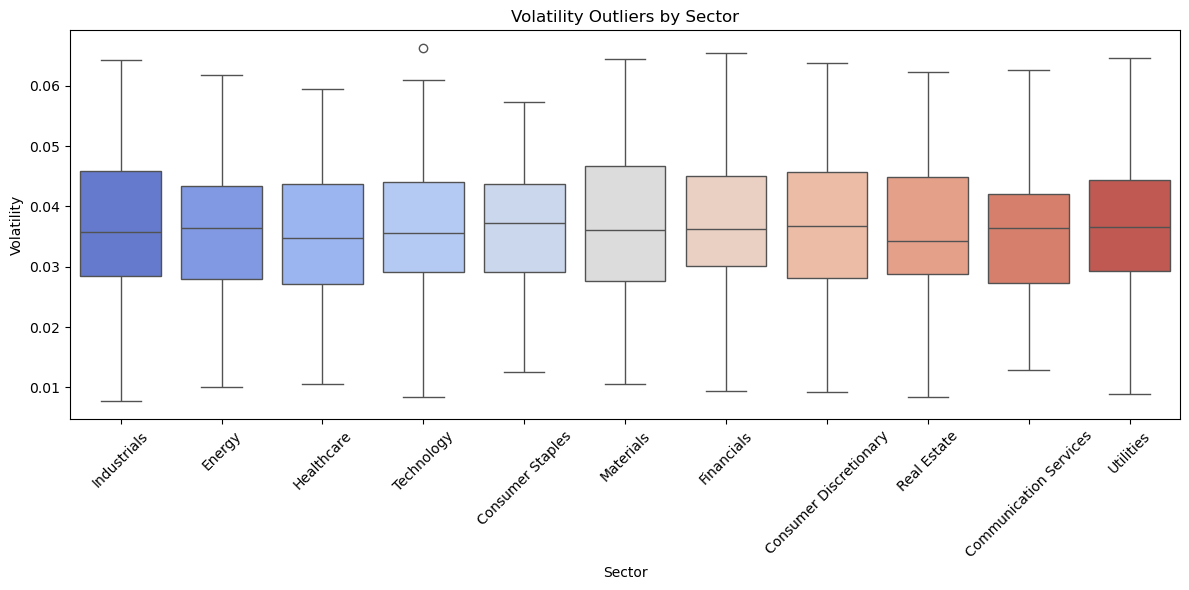

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Sector', y='Volatility', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Volatility Outliers by Sector")
plt.tight_layout()
plt.show()

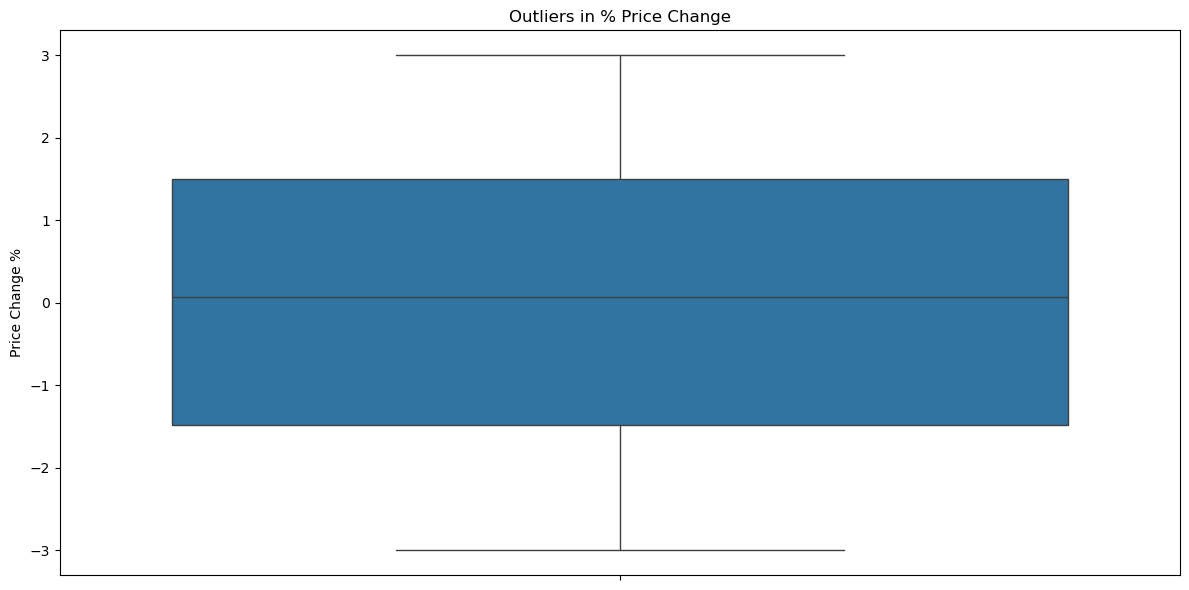

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='Price Change %')
plt.title("Outliers in % Price Change")
plt.tight_layout()
plt.show()

#### Insights

* Some stocks have over 15% daily movement—watch out for high-risk trades.
* Energy & Tech sectors have wide volatility ranges, indicating frequent big moves.
* Outliers seen in % change may represent news-driven or speculative stocks.
* Most sectors have daily change within ±3%, which shows market stability overall.